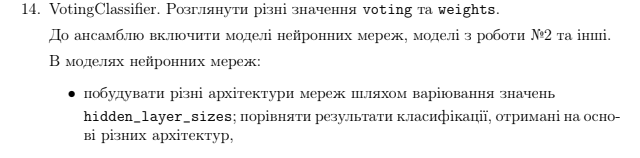
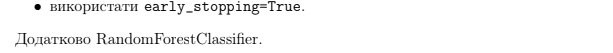
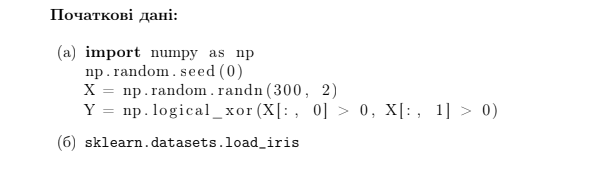

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, 
                             precision_score, recall_score, roc_curve, auc,
                             RocCurveDisplay, ConfusionMatrixDisplay)

%matplotlib inline

#### Ініціалізуємо початкові дані:

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

Перш ніж виконувати класифікацію, ми повинні розділити наші дані на навчальні (70%), тестові дані (15%) і перевірочні (15%). Ми будемо використовувати навчальні дані для вивчення моделі. перевірочний - для налаштування гiперпараметрiв, а тестові дані для вимірювання точності нашої моделі класифікації.

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.82)

#### Побудуємо моделi нейронних мереж, використовуючи класи MLPClassifier

Оскільки MLP чутливий до ненормованих ознак, то виконаємо попередю обробку, що полягає в масштабуванні наших даних за допомогою StandardScaler(). Це допомагає нам прискорити наш алгоритм і отримати більш точний класифікатор. 

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
def conf_matrix(model, y_test ,y_pred):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

In [51]:
def analyze_model(model, y_test, y_pred):   
    score = model.score(X_test, y_test)    
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Score: ", score)
    print("Precision score: ", precision)
    print("Recall score: ", recall)
    print("F1 score: ", f1)
    print("Accuracy: ", accuracy)

    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=model.classes_[1])
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
    print('AUC score:', auc(fpr, tpr)) 
    print(f"Loss curve: {model.loss_curve_[:3]}...{model.loss_curve_[-3:]}")
    
    conf_matrix(model, y_test, y_pred)
    
    print("ROC curve :")
    roc_display.plot()
    plt.show()

hidden_layer_sizes: за допомогою цього параметра ми можемо вказати кількість шарів і кількість вузлів, які ми хочемо мати в класифікаторі нейронних мереж. Кожен елемент у кортежі представляє кількість вузлів у i-ій позиції, де i — індекс кортежу. Таким чином, довжина кортежа вказує на загальну кількість прихованих шарів у нейронній мережі. <br/>
early_stopping: чи використовувати раннє припинення для припинення навчання під час перевірки, якщо оцінка не покращується. Якщо встановлено значення true, то відкласти 10% даних навчання як підтвердження та припинити навчання, коли оцінка підтвердження не покращується принаймні на n_iter_no_change(=10) послідовних поколінь навчання. 

In [70]:
clf1 = MLPClassifier(hidden_layer_sizes=(150, 100, 10), early_stopping=True)
clf2 = MLPClassifier(hidden_layer_sizes=(10, 100, 150), early_stopping=True)
clf3 = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), early_stopping=True)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

y1_pred = clf1.predict(X_test)
y2_pred = clf2.predict(X_test)
y3_pred = clf3.predict(X_test)

Score:  0.391304347826087
Precision score:  0.7254901960784313
Recall score:  0.6190476190476191
F1 score:  0.40769230769230763
Accuracy:  0.391304347826087
AUC score: 0.07142857142857142
Loss curve: [1.2575039316176844, 1.2155855507849724, 1.179630887605421]...[0.9613163208954669, 0.944286556241508, 0.9272677575926761]


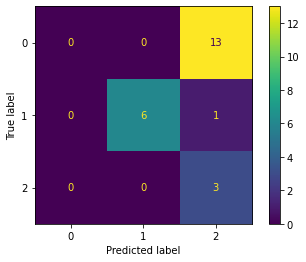

ROC curve :


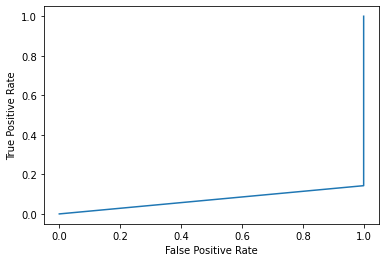

In [71]:
analyze_model(clf1, y_test, y1_pred)

Score:  0.782608695652174
Precision score:  0.7222222222222222
Recall score:  0.8058608058608058
F1 score:  0.7329059829059829
Accuracy:  0.782608695652174
AUC score: 0.8169642857142857
Loss curve: [1.1193841955835278, 1.0752952872994403, 1.034806059509231]...[0.6978343760049615, 0.6723581136860637, 0.6475706852400385]


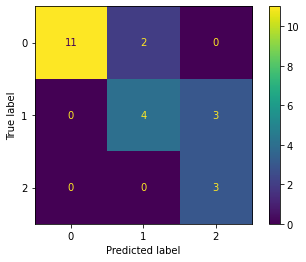

ROC curve :


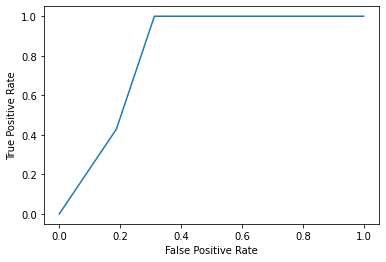

In [72]:
analyze_model(clf2, y_test, y2_pred)

Score:  0.9565217391304348
Precision score:  0.9166666666666666
Recall score:  0.9523809523809524
F1 score:  0.9267399267399267
Accuracy:  0.9565217391304348
AUC score: 0.8258928571428571
Loss curve: [1.088764551754364, 1.0439034667943408, 1.0022814747090993]...[0.29665128729288565, 0.2762531985276057, 0.25734686079441443]


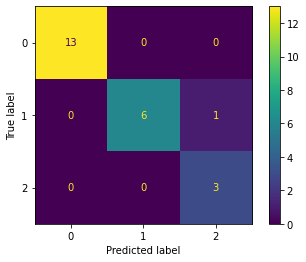

ROC curve :


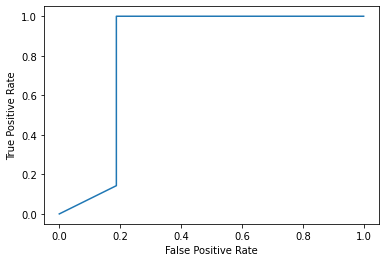

In [73]:
analyze_model(clf3, y_test, y3_pred)

Серед отриманих результатів бачимо, що найкраща модель є модель clf3 із параметрами  <br/> MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), early_stopping=True)

Спробуємо пiдiбрати значення гiперпараметрiв, використовуючи решiтчатий пошук.

In [77]:
from itertools import combinations_with_replacement

param_grid = {'hidden_layer_sizes': list(combinations_with_replacement(np.arange(20,150,30), 4)),
              'early_stopping':[True]}

grid_mlp = GridSearchCV(MLPClassifier(), param_grid)
grid_mlp.fit(X_valid, y_valid)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'early_stopping': [True],
                         'hidden_layer_sizes': [(20, 20, 20, 20),
                                                (20, 20, 20, 50),
                                                (20, 20, 20, 80),
                                                (20, 20, 20, 110),
                                                (20, 20, 20, 140),
                                                (20, 20, 50, 50),
                                                (20, 20, 50, 80),
                                                (20, 20, 50, 110),
                                                (20, 20, 50, 140),
                                                (20, 20, 80, 80),
                                                (20, 20, 80, 110),
                                                (20, 20, 80, 140),
                                                (20, 20, 110, 110),
                                           

In [78]:
grid_mlp.best_params_

{'early_stopping': True, 'hidden_layer_sizes': (50, 80, 110, 140)}

Score:  0.9565217391304348
Precision score:  0.9583333333333334
Recall score:  0.8888888888888888
F1 score:  0.9111111111111111
Accuracy:  0.9565217391304348
AUC score: 0.84375
Loss curve: [1.1264707239978964, 1.0691670912289954, 1.0164016555688726]...[0.5301487074852187, 0.4903893974912673, 0.45254551852345837]


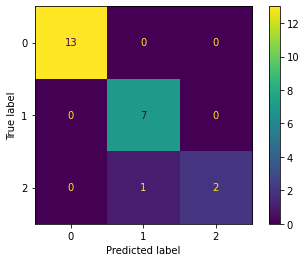

ROC curve :


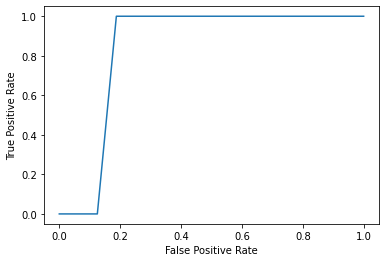

In [79]:
mlp_grid = grid_mlp.best_estimator_
mlp_grid.fit(X_train, y_train)
y_pred = mlp_grid.predict(X_test)
analyze_model(mlp_grid, y_test, y_pred)

Як бачимо GridSearch зумів підібрати модель із параметрами: 'early_stopping': True, 'hidden_layer_sizes': (50, 80, 110, 140). Дана модель показує дуже хороший результат і лише на трохи краще за вище досліджувану модедь clf3.


#### Побудуємо ансамблі RandomForest:

Технічно це метод ансамблю (на основі підходу «розділяй і володарюй») дерев рішень, згенерованих на основі випадково розділеного набору даних. Ця колекція класифікаторів дерева рішень також відома як ліс. Окремі дерева рішень генеруються за допомогою індикатора вибору атрибутів, такого як приріст інформації, коефіцієнт посилення та індекс Джіні для кожного атрибута. Кожне дерево залежить від незалежної випадкової вибірки. У задачі класифікації кожне дерево голосує, і в якості кінцевого результату вибирається найпопулярніший клас. <br/>
Він працює в чотири кроки:

   - Вибераємо випадкові вибірки з заданого набору даних.
   - Будуємо дерево рішень для кожної вибірки та отримаємо результат прогнозу з кожного дерева рішень.
   - Проводимо голосування за кожен прогнозований результат.
   - Вибераємо результат прогнозу з найбільшою кількістю голосів як остаточний прогноз.


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [95]:
def accuracy_estimators(model, X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_model_pred = model.predict(X_test)
    y = [accuracy_score(y_test, y_model_pred)]
    scores =[]
    for k in range(1, 200):
        rfc = RandomForestClassifier(n_estimators=k, random_state=0)
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
        
        y.append(accuracy_score(y_test, y_model_pred))

    plt.plot(range(1, 200), scores)
    plt.plot(range(200), y)
    plt.xlabel('Value of n_estimators for Random Forest Classifier')
    plt.ylabel('Accuracy score')
    
    plt.show()

Побудуємо графiки залежностi значень мiри якостi вiд значення n_estimators для ансамблiв та iндивiдуальних моделей на однiй координатнiй вiсi. В якостi мiри якостi оберемо accuracy_score.

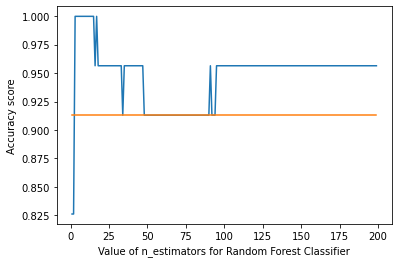

In [94]:
accuracy_estimators(DecisionTreeClassifier(),X_train,y_train,X_test,y_test)

З даного графіка можна спостерігати, що найвищий результат досягається при n_estimators<15, а при значенні 50 < n_estimators < 100 трапився просяд на те значення accuracy_score яке досягає індивідуальна модель DecisionTreeClassifier.

Також порівняємо DecisionTreeClassifier проти RandomForestClassifier: 
- Випадкові ліси — це набір кількох дерев рішень.
- Дерева рішень можуть страждати від перенавчання, але випадкові ліси запобігають перенавчанню, створюючи дерева на випадкових підмножинах.
- DecisionTree обчислюються швидше.  RandomForest повільно генерують прогнози, оскільки мають кілька дерев рішень. Щоразу, коли він робить прогноз, усі дерева в лісі мають зробити прогноз для того самого вхідного даних, а потім провести голосування за нього. Весь цей процес займає багато часу. 

Спробуємо пiдiбрати значення гiперпараметрiв.

In [100]:
def search_parameters(X_train, y_train, X_test, y_test, estimators, max_depths, max_features, bootstraps):
    results = {"n_estimators":[],"max_depth":[], "max_features":[], "bootstrap":[], "accuracy":[], "f1":[]}
    for max_depth in max_depths:
        for max_feature in max_features:
            for n_estimators in estimators:
                for bootstrap in bootstraps:
                    clf = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth, 
                                                 max_features=max_feature, bootstrap=bootstrap, random_state=0)
                    clf.fit(X_train, y_train)
                    
                    results['n_estimators'].append(n_estimators)
                    results['max_depth'].append(max_depth)
                    results['max_features'].append(max_feature)
                    results['bootstrap'].append(bootstrap)
                    y_pred = clf.predict(X_test)
                    results['accuracy'].append(accuracy_score(y_test, y_pred))
                    results['f1'].append(f1_score(y_test, y_pred, average='macro'))
                    


    results_df = pd.DataFrame.from_dict(results, orient='index')
    return results_df

In [108]:
n_estimators=[50, 100, 150]
max_depths = [2, 10, 20]
max_features = [2, 3, 4]
bootstraps = [True, False]

analyz = search_parameters(X_train, y_train, X_test, y_test, n_estimators, max_depths, max_features, bootstraps)
analyz.transpose().sort_values(['accuracy','f1'], ascending=False).head()

,n_estimators,max_depth,max_features,bootstrap,accuracy,f1
2,100,2,2,True,1.0,1.0
4,150,2,2,True,1.0,1.0
6,50,2,3,True,1.0,1.0
8,100,2,3,True,1.0,1.0
10,150,2,3,True,1.0,1.0


Отримали декілька однаково добре навчаних моделей з різними параметрами.

Спробуємо пiдiбрати значення гiперпараметрiв, використовуючи решiтчатий пошук.

In [109]:
param_grid = {'n_estimators': [2, 5, 10, 20, 50, 100, 150],
              'max_depth': [2, 4, 8, 16, 32],
              'max_features': ['sqrt', 'log2'],
              'bootstrap': [True, False]}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid)
grid_rfc.fit(X_valid, y_valid)
grid_rfc.best_params_

{'bootstrap': False,
 'max_depth': 2,
 'max_features': 'log2',
 'n_estimators': 10}

In [110]:
rfc = grid_rfc.best_estimator_
rfc.fit(X_train, y_train)
print("Accuracy score:", accuracy_score(y_test, rfc.predict(X_test)))

Accuracy score: 1.0


#### Побудуємо ансамблі моделей, використовуючи метод VotingClassifier:

Voting Classifier - це модель машинного навчання, яка тренується на ансамблі численних моделей і прогнозує вихід(клас) на основі їх найвищої ймовірності вибраного класу як результату.
Він просто об’єднує результати кожного класифікатора, переданого в класифікатор голосування, і прогнозує вихідний клас на основі найбільшої кількості голосів. Ідея полягає в тому, щоб замість того, щоб створювати окремі спеціальні моделі та знаходити точність для кожної з них, ми створюємо єдину модель, яка тренується за цими моделями та класифікує на основі сукупної більшості голосів для кожного класу вихідних даних. 

Для того, щоб побудувати ансамбль моделей потрібно визначити, які моделі ми будемо використовувати для побудови. У даному випадку використаємо наступні моделі:
- DecisionTreeClassifier(max_depth=10, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=7, max_features=2) - дана модель була найкращою при виконнання лабораторної роботи №2.
- RandomForestClassifier(bootstrap=False, max_depth=2, max_features='log2',n_estimators=10)
- MLPClassifier(early_stopping=True, hidden_layer_sizes = (50, 80, 110, 140))
                                     

In [112]:
from sklearn.ensemble import VotingClassifier


dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=3,
                                     min_samples_leaf=5, max_leaf_nodes=7,
                                     max_features=2)
estimators = ('dtc', dtc), ('rfc', rfc), ('mlp', mlp_grid)

In [113]:
def decision_boundaries(model, X, y, n_classes=2, plot_colors = "rwb"):
    plt.figure(figsize=(16, 8)) 
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
        x = X[:, pair]
        
        model.fit(x, y)
        
        plt.subplot(2, 3, pairidx + 1)
        
        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
        
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(x[idx, 0], x[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
        
    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

In [120]:
def analyze_model(model, y_test, y_pred):      
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Precision score: ", precision)
    print("Recall score: ", recall)
    print("F1 score: ", f1)
    print("Accuracy: ", accuracy)

    conf_matrix(model, y_test, y_pred)

In [131]:
def ensemble_vs_model(estimators, X_train, y_train, X_test, y_test):
    eclf_soft = VotingClassifier(estimators=estimators, voting='soft')
    eclf_hard = VotingClassifier(estimators=estimators, voting='hard')
    
    #also check how long the study takes
    print('Study time for ensemble VotingClassifier with voting="soft"')
    %timeit eclf_soft.fit(X_train, y_train)
    print('\nStudy time for ensemble VotingClassifier with voting="hard"')
    %timeit eclf_hard.fit(X_train, y_train)
    
    for model in estimators:
        clf = model[1]
        print('\nStudy time for model', clf.__class__.__name__)
        %timeit clf.fit(X_train, y_train)
        
    y_soft_pred = eclf_soft.predict(X_test)
    print(f'\nBias: {np.mean(y_test - y_soft_pred)**2:.3f} and Variance: {np.var(y_soft_pred):.3f} for ensemble VotingClassifier with voting="soft"')    
    print('Analysis of efficiency  for ensemble VotingClassifier with voting="soft"')
    analyze_model(eclf_soft, y_test, y_soft_pred)
    
    y_hard_pred = eclf_hard.predict(X_test)
    print(f'\nBias: {np.mean(y_test - y_hard_pred)**2:.3f} and Variance: {np.var(y_hard_pred):.3f} for ensemble VotingClassifier with voting="hard"') 
    print('Analysis of efficiency  for ensemble VotingClassifier with voting="hard"')
    analyze_model(eclf_hard, y_test, y_hard_pred)
    
    for model in estimators:
        clf = model[1]
        y_pred = clf.predict(X_test)
        print(f'\nBias: {np.mean(y_test - y_pred)**2:.4f} and Variance: {np.var(y_pred):.3f} for model {clf.__class__.__name__}')
        
        print('Analysis of efficiency  for model', clf.__class__.__name__)
        analyze_model(clf,y_test, y_pred)
        
    print('\nDecision boundaries for ensemble VotingClassifier with voting="soft"')
    decision_boundaries(eclf_soft, X_train, y_train, n_classes=3)
    print('Decision boundaries for ensemble VotingClassifier with voting="hard"')
    decision_boundaries(eclf_hard, X_train, y_train, n_classes=3)
    
    for model in estimators:
        clf = model[1]
        print('\nDecision boundaries for model', clf.__class__.__name__)
        decision_boundaries(clf, X_train, y_train, n_classes=3)


Study time for ensemble VotingClassifier with voting="soft"
143 ms ± 35.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Study time for ensemble VotingClassifier with voting="hard"
141 ms ± 8.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Study time for model DecisionTreeClassifier
305 µs ± 4.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Study time for model RandomForestClassifier
9.64 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Study time for model MLPClassifier
113 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Bias: 0.008 and Variance: 0.722 for ensemble VotingClassifier with voting="soft"
Analysis of efficiency  for ensemble VotingClassifier with voting="soft"
Precision score:  0.8888888888888888
Recall score:  0.9259259259259259
F1 score:  0.8916666666666667
Accuracy:  0.9130434782608695


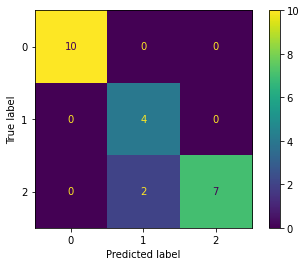


Bias: 0.008 and Variance: 0.722 for ensemble VotingClassifier with voting="hard"
Analysis of efficiency  for ensemble VotingClassifier with voting="hard"
Precision score:  0.8888888888888888
Recall score:  0.9259259259259259
F1 score:  0.8916666666666667
Accuracy:  0.9130434782608695


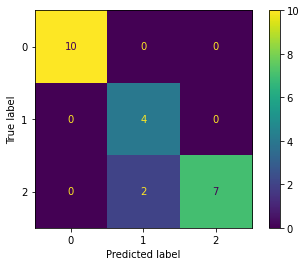


Bias: 0.0076 and Variance: 0.722 for model DecisionTreeClassifier
Analysis of efficiency  for model DecisionTreeClassifier
Precision score:  0.8888888888888888
Recall score:  0.9259259259259259
F1 score:  0.8916666666666667
Accuracy:  0.9130434782608695


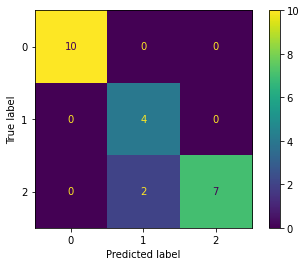


Bias: 0.0076 and Variance: 0.722 for model RandomForestClassifier
Analysis of efficiency  for model RandomForestClassifier
Precision score:  0.8888888888888888
Recall score:  0.9259259259259259
F1 score:  0.8916666666666667
Accuracy:  0.9130434782608695


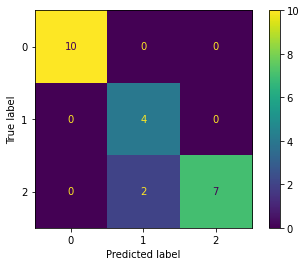


Bias: 0.0019 and Variance: 0.870 for model MLPClassifier
Analysis of efficiency  for model MLPClassifier
Precision score:  0.9666666666666667
Recall score:  0.9166666666666666
F1 score:  0.9348370927318296
Accuracy:  0.9565217391304348


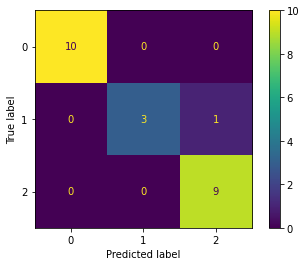


Decision boundaries for ensemble VotingClassifier with voting="soft"


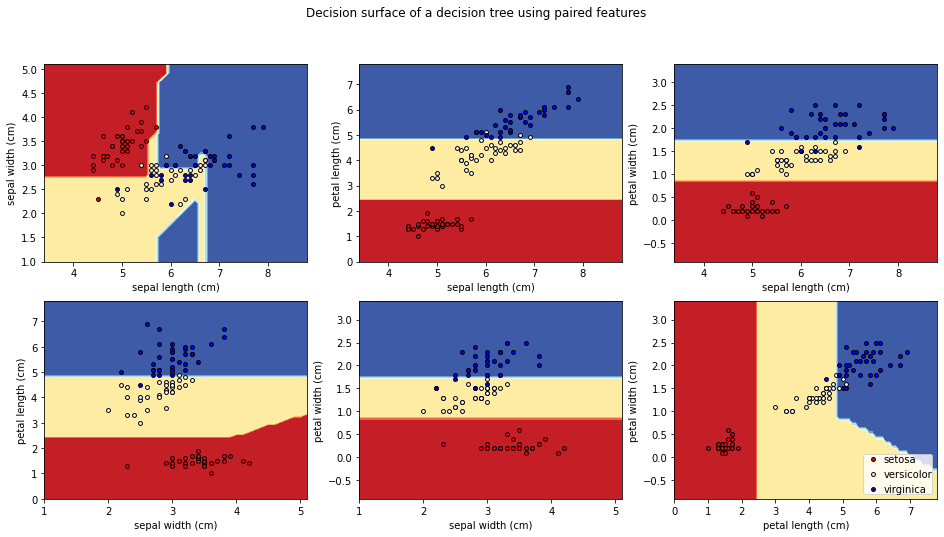

Decision boundaries for ensemble VotingClassifier with voting="hard"


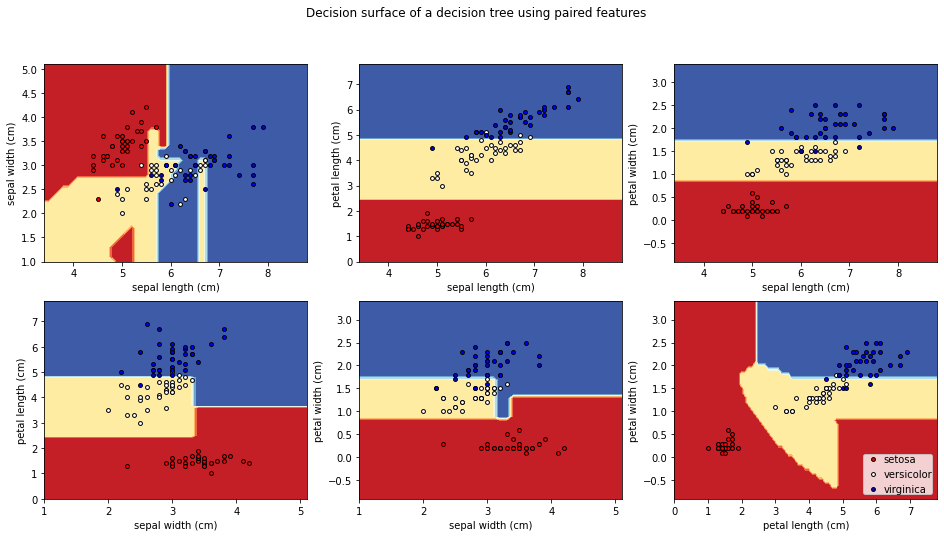


Decision boundaries for model DecisionTreeClassifier


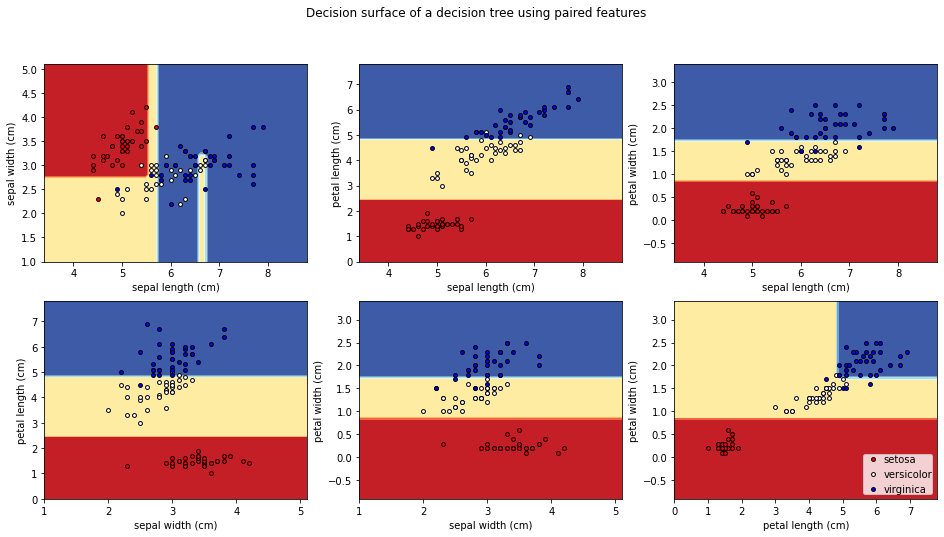


Decision boundaries for model RandomForestClassifier


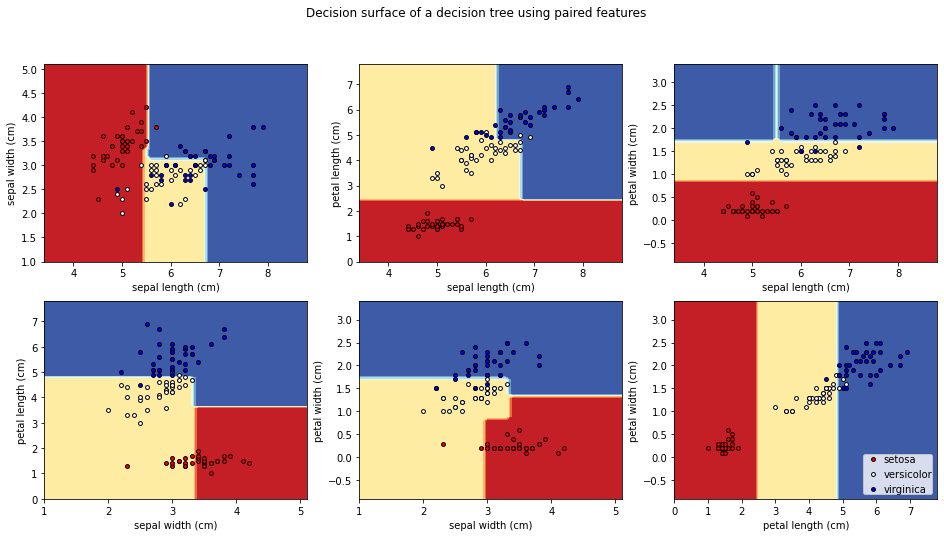


Decision boundaries for model MLPClassifier


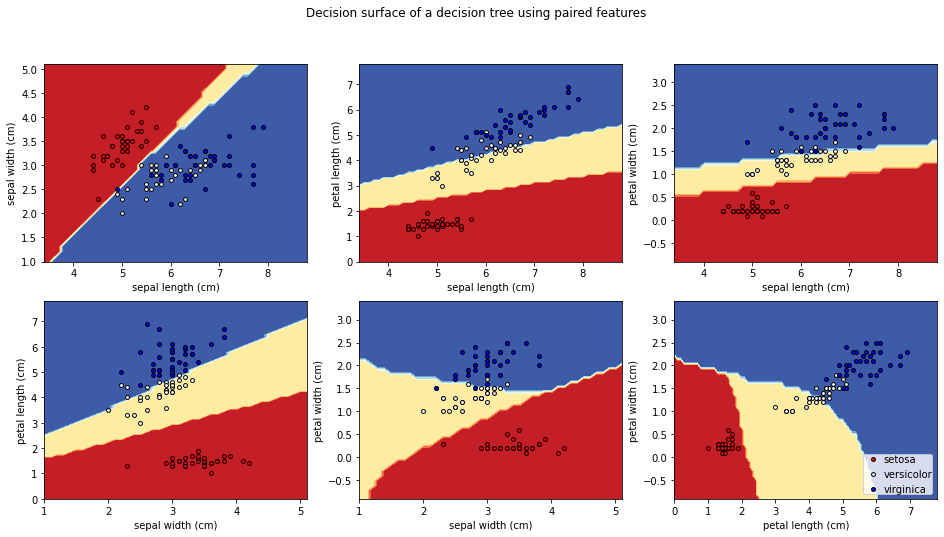

In [133]:
ensemble_vs_model(estimators, X_train, y_train, X_test, y_test)

Отож, з вище отриманих результатів можна зробити наступні висновки:
#### Час виконання:
Навчання ансамблем VotingClassifier займає значно більше часу, ніж окремі моделі. Також VotingClassifier з м'яким голосування навчається швидше, ніж VotingClassifier з жорстким голосування.
#### Дисперсія та зміщення:
При навчання ансамблем VotingClassifier дисперсія стала меншою, ніж в окремих моделей, а також зменшилось зміщення.
####  Схильність до перенавчання:
При навчані ансамблем VotingClassifier схильність до перенавчання завжди менша, ніж при навчання окремими моделями.
#### Якість моделі:
Щодо якості навчання ансамбля VotingClassifier та якості навчання окремими моделей, то звісно результати ансамблю будуть більш точними у загальному випадку. Проте можуть існувати(та існувати майже завжди) випадки навчання, коли окрема модель отримає краще результат на тестових даних. 